In [1]:
workdir = "/SNS/users/lj7/simulations/mantid2mcvine_instrument_conversion/explore"
!mkdir -p {workdir}
%cd {workdir}

/SNS/users/lj7/simulations/mantid2mcvine_instrument_conversion/explore


In [2]:
import sys, os
import numpy as np, h5py
import histogram as H, histogram.hdf as hh
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
import mcvine
mcvine

<module 'mcvine' from '/home/lj7/dv/mcvine/export/lib/python2.7/site-packages/mcvine/__init__.pyc'>

In [4]:
#!mcvine

# Mantid IDF XML

In [14]:
# cat /SNS/users/lj7/simulations/CHESS/instrument_xml/CHESS_geo_8packs_v3.xml

In [15]:
%%file mantid.xml
<?xml version='1.0' encoding='ASCII'?>
<instrument 
    xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" 
    xmlns="http://www.mantidproject.org/IDF/1.0" 
    last-modified="2016-10-07 16:44:43.011103" 
    name="MCVINETEST" 
    valid-from="2017-05-15 00:00:00" 
    valid-to="2020-07-13 23:59:59" 
    xsi:schemaLocation="http://www.mantidproject.org/IDF/1.0 http://schema.mantidproject.org/IDF/1.0/IDFSchema.xsd">

<defaults>
  <length unit="metre"/>
  <angle unit="degree"/>
  <reference-frame>
    <along-beam axis="z"/>
    <pointing-up axis="y"/>
    <handedness val="right"/>
  </reference-frame>
</defaults>

!--SOURCE and SAMPLE positions-->
<component type="moderator">
  <location z="-10."/>
</component>
<type is="Source" name="moderator"/>
<component type="sample-position">
  <location x="0.0" y="0.0" z="0.0"/>
</component>
<type is="SamplePos" name="sample-position"/>

<!--MONITORS-->
<component idlist="monitors" type="monitors">
  <location/>
</component>
<type name="monitors">
  <component type="monitor">
    <location name="monitor1" z="-5"/>
  </component>
</type>

<!--DETECTOR bank IDs-->
<component idlist="detectors" type="detectors">
  <location/>
</component>
<type name="detectors">
  <component type="bank1">
    <location/>
  </component>
</type>

<!--DETECTOR bank positions and orientations-->
<type name="bank1">
  <component type="eightpack">
    <location x="0.087176" y="0.000000" z="2.494003">
      <rot axis-x="0" axis-y="1" axis-z="0" val="2.000">
      </rot>
    </location>
  </component>
</type>

!--STANDARD 8-PACK-->
<type name="eightpack">
  <properties/>
  <component type="tube">
    <location name="tube1" x="-0.064827" y="0.000000" z="-0.019898"/>
    <location name="tube2" x="-0.043886" y="0.000000" z="0.018667"/>
    <location name="tube3" x="-0.021611" y="0.000000" z="-0.019144"/>
    <location name="tube4" x="0.000000" y="0.000000" z="0.019050"/>
    <location name="tube5" x="0.021611" y="0.000000" z="-0.019144"/>
    <location name="tube6" x="0.043886" y="0.000000" z="0.018667"/>
    <location name="tube7" x="0.064827" y="0.000000" z="-0.019898"/>
    <location name="tube8" x="0.087758" y="0.000000" z="0.017518"/>
  </component>
</type>

!--STANDARD 1.5m 128 PIXEL TUBE-->
<type name="tube" outline="yes">
  <properties/>
  <component type="pixel">
    <location name="pixel1" y="-0.744141"/>
    <location name="pixel2" y="-0.732422"/>
    <location name="pixel3" y="-0.720703"/>
    <location name="pixel4" y="-0.708984"/>
    <location name="pixel5" y="-0.697266"/>
    <location name="pixel6" y="-0.685547"/>
    <location name="pixel7" y="-0.673828"/>
    <location name="pixel8" y="-0.662109"/>
    <location name="pixel9" y="-0.650391"/>
    <location name="pixel10" y="-0.638672"/>
    <location name="pixel11" y="-0.626953"/>
    <location name="pixel12" y="-0.615234"/>
    <location name="pixel13" y="-0.603516"/>
    <location name="pixel14" y="-0.591797"/>
    <location name="pixel15" y="-0.580078"/>
    <location name="pixel16" y="-0.568359"/>
    <location name="pixel17" y="-0.556641"/>
    <location name="pixel18" y="-0.544922"/>
    <location name="pixel19" y="-0.533203"/>
    <location name="pixel20" y="-0.521484"/>
    <location name="pixel21" y="-0.509766"/>
    <location name="pixel22" y="-0.498047"/>
    <location name="pixel23" y="-0.486328"/>
    <location name="pixel24" y="-0.474609"/>
    <location name="pixel25" y="-0.462891"/>
    <location name="pixel26" y="-0.451172"/>
    <location name="pixel27" y="-0.439453"/>
    <location name="pixel28" y="-0.427734"/>
    <location name="pixel29" y="-0.416016"/>
    <location name="pixel30" y="-0.404297"/>
    <location name="pixel31" y="-0.392578"/>
    <location name="pixel32" y="-0.380859"/>
    <location name="pixel33" y="-0.369141"/>
    <location name="pixel34" y="-0.357422"/>
    <location name="pixel35" y="-0.345703"/>
    <location name="pixel36" y="-0.333984"/>
    <location name="pixel37" y="-0.322266"/>
    <location name="pixel38" y="-0.310547"/>
    <location name="pixel39" y="-0.298828"/>
    <location name="pixel40" y="-0.287109"/>
    <location name="pixel41" y="-0.275391"/>
    <location name="pixel42" y="-0.263672"/>
    <location name="pixel43" y="-0.251953"/>
    <location name="pixel44" y="-0.240234"/>
    <location name="pixel45" y="-0.228516"/>
    <location name="pixel46" y="-0.216797"/>
    <location name="pixel47" y="-0.205078"/>
    <location name="pixel48" y="-0.193359"/>
    <location name="pixel49" y="-0.181641"/>
    <location name="pixel50" y="-0.169922"/>
    <location name="pixel51" y="-0.158203"/>
    <location name="pixel52" y="-0.146484"/>
    <location name="pixel53" y="-0.134766"/>
    <location name="pixel54" y="-0.123047"/>
    <location name="pixel55" y="-0.111328"/>
    <location name="pixel56" y="-0.099609"/>
    <location name="pixel57" y="-0.087891"/>
    <location name="pixel58" y="-0.076172"/>
    <location name="pixel59" y="-0.064453"/>
    <location name="pixel60" y="-0.052734"/>
    <location name="pixel61" y="-0.041016"/>
    <location name="pixel62" y="-0.029297"/>
    <location name="pixel63" y="-0.017578"/>
    <location name="pixel64" y="-0.005859"/>
    <location name="pixel65" y="0.005859"/>
    <location name="pixel66" y="0.017578"/>
    <location name="pixel67" y="0.029297"/>
    <location name="pixel68" y="0.041016"/>
    <location name="pixel69" y="0.052734"/>
    <location name="pixel70" y="0.064453"/>
    <location name="pixel71" y="0.076172"/>
    <location name="pixel72" y="0.087891"/>
    <location name="pixel73" y="0.099609"/>
    <location name="pixel74" y="0.111328"/>
    <location name="pixel75" y="0.123047"/>
    <location name="pixel76" y="0.134766"/>
    <location name="pixel77" y="0.146484"/>
    <location name="pixel78" y="0.158203"/>
    <location name="pixel79" y="0.169922"/>
    <location name="pixel80" y="0.181641"/>
    <location name="pixel81" y="0.193359"/>
    <location name="pixel82" y="0.205078"/>
    <location name="pixel83" y="0.216797"/>
    <location name="pixel84" y="0.228516"/>
    <location name="pixel85" y="0.240234"/>
    <location name="pixel86" y="0.251953"/>
    <location name="pixel87" y="0.263672"/>
    <location name="pixel88" y="0.275391"/>
    <location name="pixel89" y="0.287109"/>
    <location name="pixel90" y="0.298828"/>
    <location name="pixel91" y="0.310547"/>
    <location name="pixel92" y="0.322266"/>
    <location name="pixel93" y="0.333984"/>
    <location name="pixel94" y="0.345703"/>
    <location name="pixel95" y="0.357422"/>
    <location name="pixel96" y="0.369141"/>
    <location name="pixel97" y="0.380859"/>
    <location name="pixel98" y="0.392578"/>
    <location name="pixel99" y="0.404297"/>
    <location name="pixel100" y="0.416016"/>
    <location name="pixel101" y="0.427734"/>
    <location name="pixel102" y="0.439453"/>
    <location name="pixel103" y="0.451172"/>
    <location name="pixel104" y="0.462891"/>
    <location name="pixel105" y="0.474609"/>
    <location name="pixel106" y="0.486328"/>
    <location name="pixel107" y="0.498047"/>
    <location name="pixel108" y="0.509766"/>
    <location name="pixel109" y="0.521484"/>
    <location name="pixel110" y="0.533203"/>
    <location name="pixel111" y="0.544922"/>
    <location name="pixel112" y="0.556641"/>
    <location name="pixel113" y="0.568359"/>
    <location name="pixel114" y="0.580078"/>
    <location name="pixel115" y="0.591797"/>
    <location name="pixel116" y="0.603516"/>
    <location name="pixel117" y="0.615234"/>
    <location name="pixel118" y="0.626953"/>
    <location name="pixel119" y="0.638672"/>
    <location name="pixel120" y="0.650391"/>
    <location name="pixel121" y="0.662109"/>
    <location name="pixel122" y="0.673828"/>
    <location name="pixel123" y="0.685547"/>
    <location name="pixel124" y="0.697266"/>
    <location name="pixel125" y="0.708984"/>
    <location name="pixel126" y="0.720703"/>
    <location name="pixel127" y="0.732422"/>
    <location name="pixel128" y="0.744141"/>
  </component>
</type>

<!--PIXEL FOR STANDARD 1.5m 128 PIXEL TUBE-->
<type is="detector" name="pixel">
  <cylinder id="cyl-approx">
    <centre-of-bottom-base p="0.0" r="0.0" t="0.0"/>
    <axis x="0" y="1" z="0"/>
    <radius val="0.012700"/>
    <height val="0.011719"/>
  </cylinder>
  <algebra val="cyl-approx"/>
</type>

<!--MONITOR shape-->
<type is="monitor" name="monitor">
  <cylinder id="cyl-approx">
    <centre-of-bottom-base p="0.0" r="0.0" t="0.0"/>
    <axis x="0" y="1" z="0"/>
    <radius val="0.01"/>
    <height val="0.03"/>
  </cylinder>
  <algebra val="cyl-approx"/>
</type>

<!--DETECTOR IDs (128 * 8 * # of banks)-->
<idlist idname="detectors">
  <id end="1023" start="0"/>
</idlist>

<!--MONITOR IDs-->
<idlist idname="monitors">
  <id val="-1"/>
</idlist>

<!--DETECTOR parameters-->
<component-link name="detectors">
  <parameter name="tube_pressure">
    <value units="atm" val="10.0"/>
  </parameter>
  <parameter name="tube_thickness">
    <value units="metre" val="0.001016"/>
  </parameter>
  <parameter name="tube_temperature">
    <value units="K" val="292.0"/>
  </parameter>
</component-link>
</instrument>


Overwriting mantid.xml


In [5]:
mantid_xml = 'mantid.xml'

## Setup mantid

In [4]:
import xml.etree.ElementTree as ET

tree = ET.parse(mantid_xml)
root = tree.getroot()
instrument_name = root.attrib['name']

tree = ET.parse(os.path.expanduser('~/.mantid/instrument/Facilities.xml'))
root = tree.getroot()
sns = root.find("facility[@name='SNS']")
arcs = sns.find("instrument[@name='ARCS']")

t = arcs.copy()
t.attrib['name'] = instrument_name
t.attrib['beamline'] = '99'
sns.append(t)

tree.write("new_facilities.xml")

!cp /home/lj7/.mantid/instrument/Facilities.xml /home/lj7/.mantid/instrument/Facilities.xml.saved07042017
!cp new_facilities.xml /home/lj7/.mantid/instrument/Facilities.xml

cp /SNS/users/lj7/simulations/mantid2mcvine_instrument_conversion/explore/MCVINETEST_Definition.xml \
    /home/lj7/.mantid/instrument/

# MCViNE XML

In [39]:
import BootstrapBase
reload(BootstrapBase)
import Bootstrap_mantid_idf
reload(Bootstrap_mantid_idf)
from Bootstrap_mantid_idf import InstrumentFactory as IF, units
factory = IF()
from instrument.geometry import shapes
class tube_info:
    pressure = 10.*units.pressure.atm
    radius = .5 * units.length.inch
    gap = 0.08 * units.length.inch
detsys_shape = shapes.hollowCylinder(in_radius=2., out_radius=3., height=3.)
instrument, geometer = factory.construct(
    name='mantid', idfpath="mantid.xml", 
    ds_shape = detsys_shape, tube_info=tube_info, 
    xmloutput='mcvine.xml')

Position: (87.176, 0.0, 2494.003), Rotation: inputs=[([0.0, 1.0, 0.0], 2.0)], m=[[ 0.99939083  0.         -0.0348995 ]
 [-0.          1.          0.        ]
 [ 0.0348995  -0.          0.99939083]]
write instrument to mcvine.xml


# NXS

In [16]:
nbanks = 1
ntubesperpack = 8
npixelspertube = 128
ntotpixels = nbanks*ntubesperpack*npixelspertube
print ntotpixels

1024


In [17]:
ls -l start.nxs

-rw-r--r-- 1 lj7 users 2686603 Jul  2 21:58 start.nxs


In [22]:
!cp start.nxs step1.nxs

In [23]:
with h5py.File('step1.nxs') as f:
    ws = f['mantid_workspace_1']
    ew = ws['event_workspace']
    ew['axis1'][:] = [-1, 16667.]
    # del ew['axis2']
    ew['axis2'] = np.arange(1., ntotpixels)
    attrs = ew['axis2'].attrs
    attrs['caption'] = 'Spectrum'
    attrs['label'] = ''
    attrs['units'] = 'spectraNumber'

    saved_attrs = dict(ew['indices'].attrs)
    # print saved_attrs
    saved = ew['indices'][:].copy()
    # print saved
    # print saved.dtype
    # print ew['indices'].shape
    del ew['indices']

    new_indices = np.zeros(ntotpixels+1, dtype='int64')
    new_indices[:saved.size] = saved[:new_indices.size]
    ew['indices'] = new_indices
    attrs = ew['indices'].attrs
    for k, v in saved_attrs.items():
        attrs[k]=v

    f.close()

In [24]:
# !cp step1.nxs step2.nxs

In [25]:
from mantid import simpleapi as msa
ws = msa.Load("step1.nxs")

In [27]:
cp mantid.xml MCVINETEST_Definition.xml

In [29]:
msa.LoadInstrument(Workspace=ws, Filename='./MCVINETEST_Definition.xml', RewriteSpectraMap=True)

array([-1], dtype=int32)

In [30]:
dettable = msa.PreprocessDetectorsToMD(ws)

In [31]:
msa.SaveNexusProcessed(ws, Filename="step2.nxs")

In [32]:
!cp step2.nxs step3.nxs

In [33]:
with h5py.File('step3.nxs') as f:
    ew = f['mantid_workspace_1']['event_workspace']
    del ew['indices'], ew['pulsetime'], ew['tof']
    f.close()

# Reduction scripts

In [79]:
ls scripts/

Events2Nxs.py              Events2Nxs.py.8tube_pack  Neutrons2Events.py~
Events2Nxs.py~             Events2Nxs.pyc            Neutrons2Events.pyc
Events2Nxs.py.16tube_pack  Neutrons2Events.py


In [36]:
cd {workdir}

/SNS/users/lj7/simulations/mantid2mcvine_instrument_conversion/explore


In [38]:
sys.path.insert(0, os.path.abspath('./scripts'))

# Powder cones

In [76]:
pwd

u'/SNS/users/lj7/simulations/mantid2mcvine_instrument_conversion/explore'

In [6]:
powder_workdir = "/SNS/users/lj7/simulations/mantid2mcvine_instrument_conversion/explore/powder-cones"
!mkdir -p {powder_workdir}
%cd {powder_workdir}

/SNS/users/lj7/simulations/mantid2mcvine_instrument_conversion/explore/powder-cones


In [8]:
!mcvine workflow powder --instrument=ARCS --sample=V --workdir=mysim

## Sim Beam

In [13]:
cd {powder_workdir}/mysim/beam

/SNS/users/lj7/simulations/mantid2mcvine_instrument_conversion/explore/powder-cones/mysim/beam


In [26]:
%%file run-beam.sh
#!/usr/bin/env bash

mcvine instruments arcs beam -E=70 --ncount=1e7 --nodes=20

Overwriting run-beam.sh


In [31]:
%%script bash --out beam_out --err beam_err
time ./run-beam.sh

In [58]:
#print beam_out

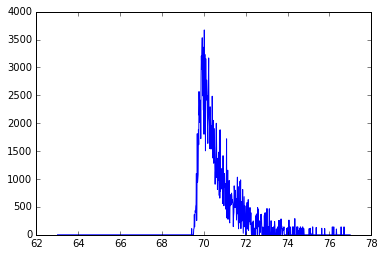

In [64]:
# plot I(E) spectrum
ie = hh.load("out/ienergy.h5")
plt.plot(ie.energy, ie.I)

## Scattering sim

In [65]:
cd {powder_workdir}/mysim

/SNS/users/lj7/simulations/mantid2mcvine_instrument_conversion/explore/powder-cones/mysim


### Change sample kernel

In [66]:
%%file sampleassembly/V-scatterer.xml
<?xml version="1.0"?>

<!DOCTYPE scatterer>

<!-- mcweights: monte-carlo weights for 3 possible processes:
     absorption, scattering, transmission -->
<homogeneous_scatterer mcweights="0, 1, 0.1">

  <KernelContainer average="yes">

    <Phonon_IncoherentElastic_Kernel dw_core='0.00701434948808*angstrom**2'>
    </Phonon_IncoherentElastic_Kernel>

    <ConstantQEKernel momentum-transfer="4/angstrom" energy-transfer="10*meV"/>

    <ConstantQEKernel momentum-transfer="7/angstrom" energy-transfer="20*meV"/>

    <ConstantQEKernel momentum-transfer="10/angstrom" energy-transfer="10*meV"/>

    </KernelContainer>
</homogeneous_scatterer>

Overwriting sampleassembly/V-scatterer.xml


### Scattering script

In [68]:
%%file scatter
#!/usr/bin/env bash

LAUNCHER=`python -c "from mcni.pyre_support.MpiApplication import mpi_launcher_choice as l; print l"`
rm -rf out && ./sss --ncount=1e7 --multiple-scattering=off --$LAUNCHER.nodes=10 --buffer_size=100000

Overwriting scatter


In [69]:
!chmod +x scatter sss reduce2iqe create-nxs

### Simulate

In [70]:
%%script --bg bash
time ./scatter &> log.scatter

Starting job # 0 in a separate thread.


In [73]:
ls -lt out/scattered-neutrons

-rw-r--r-- 1 lj7 users 800001100 Jul  3 20:41 out/scattered-neutrons


## Create NeXus file

In [41]:
%cd {powder_workdir}/mysim

/SNS/users/lj7/simulations/mantid2mcvine_instrument_conversion/explore/powder-cones/mysim


In [82]:
import Neutrons2Events

In [84]:
pwd

u'/SNS/users/lj7/simulations/mantid2mcvine_instrument_conversion/explore'

In [88]:
n2e = Neutrons2Events.Neutrons2Events(
    instrument_xml="/SNS/users/lj7/simulations/mantid2mcvine_instrument_conversion/explore/mcvine.xml",
    tofbinsize=0.1)
n2e.run('./out/scattered-neutrons', 'n2e', 10)

* executing python sd --source=NeutronFromStorage --mpirun.nodes=10 --source.path=/SNS/users/lj7/simulations/mantid2mcvine_instrument_conversion/explore/powder-cones/mysim/out/scattered-neutrons --output-dir=out --detsys.tofparams=0,1.,1e-07 --detsys.instrumentxml=/SNS/users/lj7/simulations/mantid2mcvine_instrument_conversion/explore/mcvine.xml --detsys=DetectorSystemFromXml --ncount=10000000 --detsys.eventsdat=events.dat... 


In [92]:
ls -lt n2e/out/events.dat

-rw-r--r-- 1 lj7 users 14010800 Jul  3 22:17 n2e/out/events.dat


In [39]:
import Events2Nxs
reload(Events2Nxs)

<module 'Events2Nxs' from '/SNS/users/lj7/simulations/mantid2mcvine_instrument_conversion/explore/scripts/Events2Nxs.pyc'>

In [42]:
e2nxs = Events2Nxs.Event2Nxs(
    nbanks=1, npixelspertube=128, ntubesperpack=8, nmonitors=1, 
    nxs_template='/SNS/users/lj7/simulations/mantid2mcvine_instrument_conversion/explore/step3.nxs')

e2nxs.run(eventfile='n2e/out/events.dat', nxsfile='sim.nxs', tofbinsize=0.1)

Converting n2e/out/events.dat to sim.nxs


## Reduction

In [5]:
from mantid import simpleapi as msa
reload(msa)

/home/lj7/miniconda2/envs/dev-mcvine/lib/python2.7/site-packages/mantid/kernel/__init__.py:14: RuntimeWarning: to-Python converter for std::vector<int, std::allocator<int> > already registered; second conversion method ignored.
  from ._kernel import *
/home/lj7/miniconda2/envs/dev-mcvine/lib/python2.7/site-packages/mantid/kernel/__init__.py:14: RuntimeWarning: to-Python converter for std::vector<double, std::allocator<double> > already registered; second conversion method ignored.
  from ._kernel import *


<module 'mantid.simpleapi' from '/home/lj7/miniconda2/envs/dev-mcvine/lib/python2.7/site-packages/mantid/simpleapi.pyc'>

In [10]:
cd {powder_workdir}/mysim

/SNS/users/lj7/simulations/mantid2mcvine_instrument_conversion/explore/powder-cones/mysim


In [11]:
ws = msa.Load('sim.nxs')

In [12]:
out = msa.DgsReduction(
    SampleInputWorkspace=ws, 
    IncidentEnergyGuess=70., UseIncidentEnergyGuess=1,
    TimeZeroGuess=20)

In [17]:
msa.SofQW3(
    InputWorkspace='out',
    OutputWorkspace='iqw',
    QAxisBinning="0,0.1,12",
    EMode='Direct',
    )

RebinnedOutput
Title: 
Histograms: 120
Bins: 149
Histogram
X axis: Energy transfer / meV
Y axis: Intensity
Distribution: True
Instrument: MCVINETEST (2017-May-15 to 2020-Jul-13)Instrument from: sim.nxs

Run start: not available
Run end:  not available

In [18]:
msa.SaveNexus(
    InputWorkspace='iqw',
    Filename = 'iqe.nxs',
    Title = 'iqw',
    )

In [19]:
!mcvine mantid extract_iqe iqe.nxs iqe.h5

plot z in (0, 0.003)


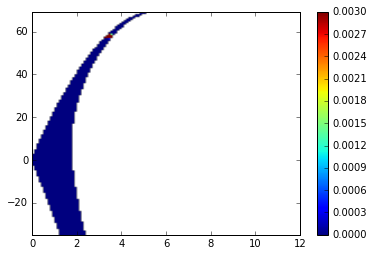

In [23]:
iqe = hh.load("iqe.h5").transpose()
H.plot(iqe, min=0, max=.003)